# **Prova Prática - Introdução ao Processamento Digital de Imagens**
##Nome: Gabriela Jachs Stepien

#**Questão 1)a):**

Utilizado as técnicas de morfologia matemática (com as funções criadas por você), execute em python a filtragem dos círculos médios apontados na imagem “Fig0943” do capítulo 9 do livro texto do González. Plote, a imagem original e a imagem filtrada, uma ao lado da outra. Discuta qualitativamente o resultado de sua filtragem. 



##***Para baixar a imagem:***
[Fig0943](https://drive.google.com/file/d/1MXJmoovRBnIInXd5BxSGHUItWdVymgXb/view?usp=sharing)

##***Importação das bibliotecas:***

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import skimage.morphology

##***Código - Operações Morfológicas:***

##***Binarização:***

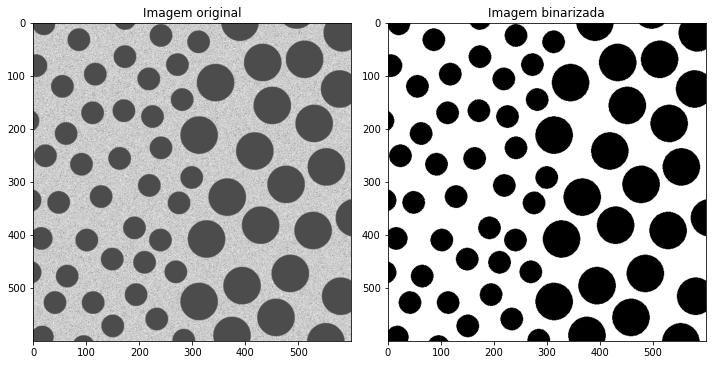

In [ ]:
img = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)
img_bin = img.copy()

threshold = 120
img_bin[img >= threshold] = 255
img_bin[img < threshold] = 0

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Imagem binarizada')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Dilatação:***

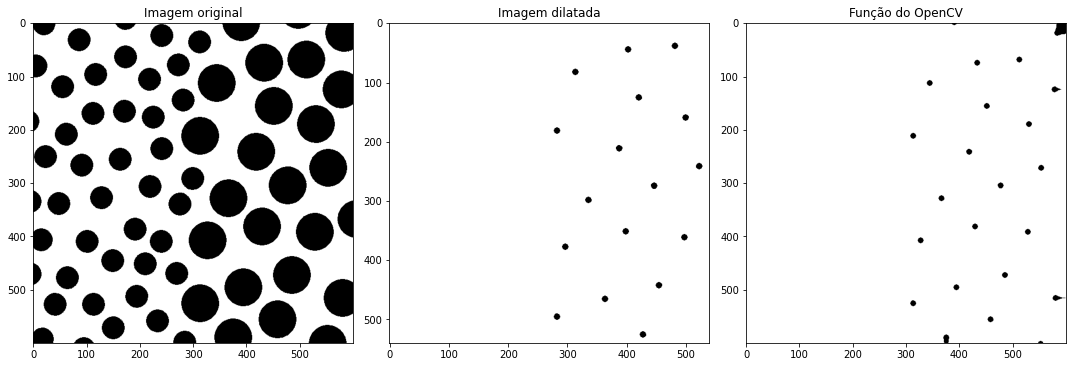

In [ ]:
#estruturante = np.ones((33,33))

def dilatacao(img, s):
    borda = (s.shape[0]-1)//2
    altura, largura = img.shape
    max_bin = img.max()
    min_bin = img.min()
    img_saida = np.zeros((altura,largura))

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            if np.sum(img[x-borda:x+borda+1, y-borda:y+borda+1]*s) != min_bin:
                img_saida[x,y] = max_bin

    return img_saida [borda: altura-borda, borda: largura-borda]
raio = 33
estruturante = skimage.morphology.disk(30)

img_dilatada = dilatacao(img_bin,estruturante)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title('Imagem original')
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.title('Imagem dilatada')
plt.imshow(img_dilatada, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.title('Função do OpenCV')
plt.imshow(cv2.dilate(img_bin, estruturante, iterations=1), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

##***Erosão:***

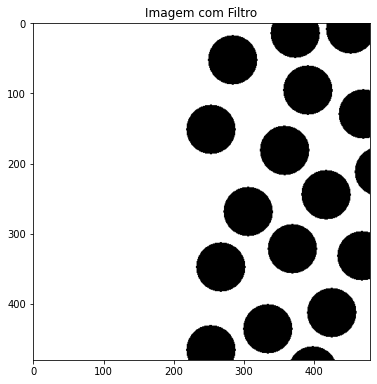

In [ ]:
def erosao(img, s):
    borda = (s.shape[0]-1)//2
    altura, largura = img.shape
    img_saida = np.zeros((altura,largura))
    max_bin = img.max() 
    soma_s = np.sum(s)*max_bin 
   
    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            if (np.sum(img[x-borda:x+borda+1, y-borda:y+borda+1]*s) == soma_s): 
                img_saida[x,y] = max_bin

    return img_saida [borda: altura-borda, borda: largura-borda]

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Imagem com Filtro')
plt.imshow(erosao(img_dilatada,estruturante), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()

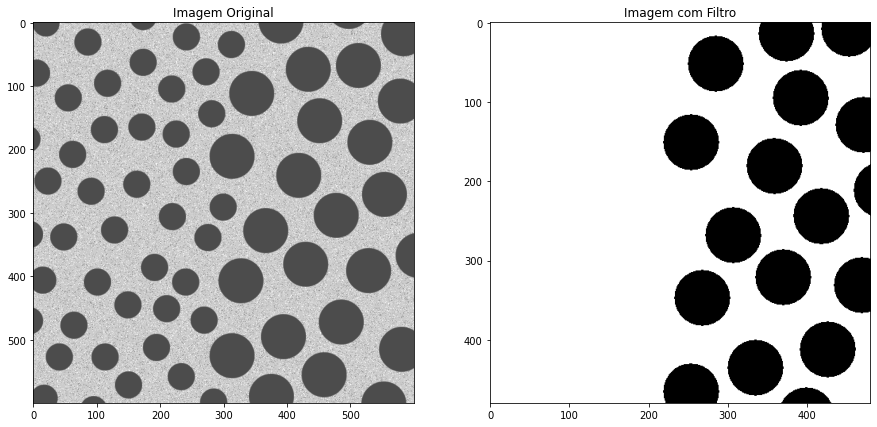

In [ ]:
img_f = erosao(img_dilatada, estruturante)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Imagem com Filtro')
plt.imshow(img_f, cmap='gray', vmin=0, vmax=255)


#**Questão 1)b):**
Utilizando a convolução 2D (com as funções desenvolvidas por você), execute em python a extração de borda (dos elementos circulares que irão permanecer) da imagem resultante da filtragem executada em a).

##***Convolução:***

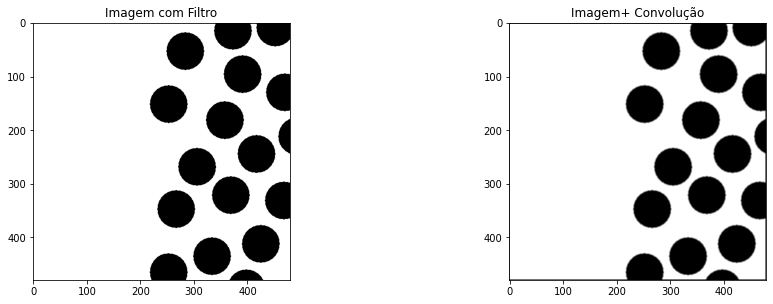

In [ ]:
img = erosao(img_dilatada, estruturante)
def convolucao(img, w):
    borda = (w.shape[0]-1)//2
    altura, largura = img.shape
    img_saida = np.zeros((altura, largura))
    w = w[::-1,::-1] #rotação do kernel p/ convolução

    for x in range(borda, altura-borda):
        for y in range(borda, largura-borda):
            img_saida[x,y] = np.ceil(np.sum(img[x-borda:x+borda+1, y-borda:y+borda+1]*w))
    return img_saida


n = 3
kernel_media = np.ones((n,n))/(n**2)

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
plt.title('Imagem com Filtro')
plt.imshow(img_f, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,2)
plt.title("Imagem+ Convolução")
plt.imshow(convolucao(img, kernel_media), cmap='gray', vmin=0, vmax=255)


plt.tight_layout()

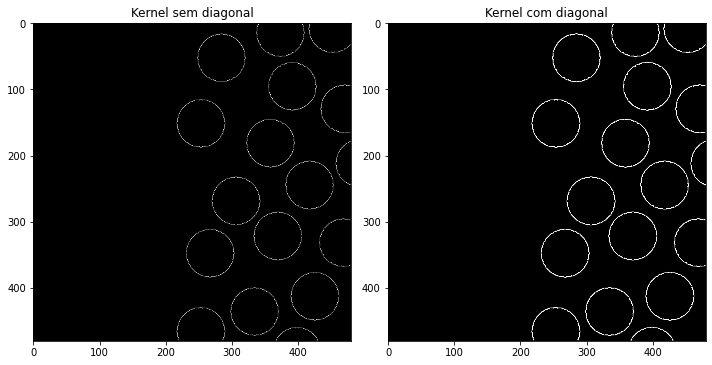

In [ ]:
kernel_laplace = np.array([[ 0,-1, 0], 
                           [-1, 4,-1],
                           [ 0,-1, 0]])

kernel_laplace_diag = np.array([[-1,-1,-1],
                                [-1, 8,-1],
                                [-1,-1,-1]])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Kernel sem diagonal')
plt.imshow(convolucao(img, kernel_laplace), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Kernel com diagonal')
plt.imshow(convolucao(img, kernel_laplace_diag), cmap='gray', vmin=0, vmax=255)

plt.tight_layout()